we are going to use scikit learn estimator to perform linear regression
use Seaborn's and Matplotlib's to display the scatterplot and regression line
Use the coefficient and intercept values calculated by the scikitlearn estimator to make predictions


In [1]:
import pandas as pd

In [2]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [3]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [4]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [5]:
nyc.Date = nyc.Date.floordiv(100)

In [6]:
nyc.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


In [7]:
from sklearn.model_selection import train_test_split

In [9]:
nyc.Date.values # gives back one dimentional array

array([1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905,
       1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916,
       1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018])

In [11]:
# reshape function with -1 rows tells pandas to create as many rows as columns in the series.
# so creting 124 rows for 124 values in numpy array. 
# this is needed as first argument to train_test_split has to be 2 dimentional array
nyc.Date.values.reshape(-1,1)

array([[1895],
       [1896],
       [1897],
       [1898],
       [1899],
       [1900],
       [1901],
       [1902],
       [1903],
       [1904],
       [1905],
       [1906],
       [1907],
       [1908],
       [1909],
       [1910],
       [1911],
       [1912],
       [1913],
       [1914],
       [1915],
       [1916],
       [1917],
       [1918],
       [1919],
       [1920],
       [1921],
       [1922],
       [1923],
       [1924],
       [1925],
       [1926],
       [1927],
       [1928],
       [1929],
       [1930],
       [1931],
       [1932],
       [1933],
       [1934],
       [1935],
       [1936],
       [1937],
       [1938],
       [1939],
       [1940],
       [1941],
       [1942],
       [1943],
       [1944],
       [1945],
       [1946],
       [1947],
       [1948],
       [1949],
       [1950],
       [1951],
       [1952],
       [1953],
       [1954],
       [1955],
       [1956],
       [1957],
       [1958],
       [1959],
       [1960],
       [19

In [12]:
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1,1), 
                                                    nyc.Temperature.values, random_state=11)

In [13]:
# data split into 75 % and 25 % training and testing

In [14]:
X_train.shape

(93, 1)

In [15]:
X_test.shape

(31, 1)

In [16]:
# importing estimator and creating estimator object
from sklearn.linear_model import LinearRegression

In [18]:
linear_regression = LinearRegression()

In [19]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [20]:
# at this stage fit method has performed learning with training dataset
# and made coefficients and slope values available for us to access 
# coef is array as in case of mulitple variables, graph may not be just strait line
linear_regression.coef_

array([0.01939167])

In [21]:
linear_regression.intercept_

-0.30779820252658396

In [22]:
# you can use y = mx + c to calculate

In [23]:
# now predict using predict method
predicted = linear_regression.predict(X_test)

In [24]:
expected = y_test

In [28]:
predicted[::5]

array([37.85501484, 38.68885679, 37.00178122, 37.25387297, 38.04893157,
       37.64170644, 36.9436062 ])

In [29]:
expected[::5]

array([31.7, 34.8, 39.4, 45.7, 32.3, 33.8, 39.7])

In [31]:
# using every 5th value to see predicted and expected data
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


In [37]:
# now use these value for predicting for year 2019 , 2020 and 1890 for which we do not have the data
# either in training or testing dataset
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

In [38]:
predict(2019)

array([38.84399018])

In [39]:
predict(2020)

array([38.86338185])

In [40]:
predict(1890)

array([36.34246432])

In [41]:
# using seborn for visualization
import seaborn as sns

(10.0, 70.0)

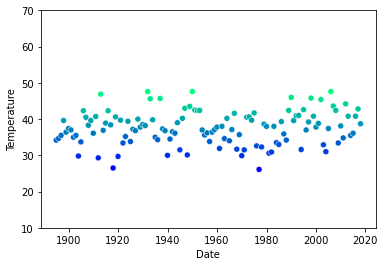

In [45]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
# increating y axes for better visibility
axes.set_ylim(10, 70)

In [46]:
import numpy as np

In [47]:
# we will find out min and max value from teh date range of nyc dataframe
# then use predict function defined earlier to get back array of predictions of temperatures
# and use these predictions to plot a graph

In [48]:
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

In [51]:
x

array([1895, 2018])

In [49]:
y = predict(x)

In [50]:
y

array([36.43942269, 38.82459851])

In [56]:
import matplotlib.pyplot as plt
# repeating some of the code we used in scatterplot 
# this is needed for jupyter notebook
# all related code should exist in single cell

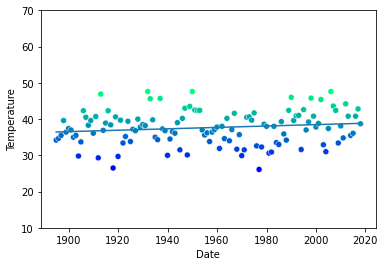

In [57]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
# increating y axes for better visibility
axes.set_ylim(10, 70)
line = plt.plot(x, y)

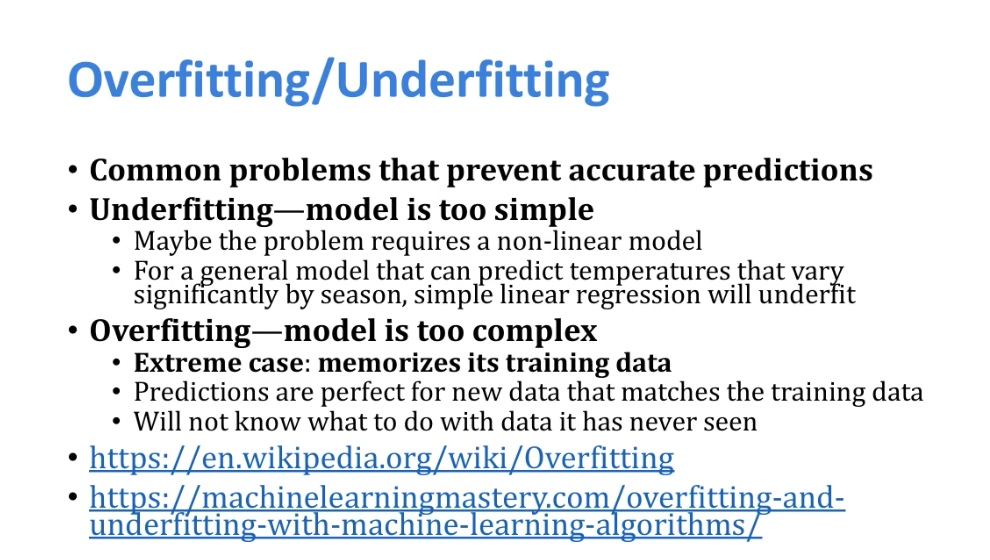